# Tax Day Strategy

In [1]:
import pandas as pd
import sys

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
sys.setrecursionlimit(100_000)

import constants
import utils


C:\Users\tomw1\AppData\Local\Temp\ipykernel_20336\1242393096.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
constants.SPLIT

False

In [3]:
constants.START

{'day': 1, 'month': 3}

In [4]:
constants.END

{'day': 30, 'month': 4}

## Rules

1. Buy at the close of the last trading day in March;
2. Sell at the close on the first trading day after calendar day 15 in April.

In [5]:
TICKERS = [
    'XLC', 
    'XLY', 
    'XLP', 
    'XLE', 
    'XLF', 
    'XLV', 
    'XLI', 
    'XLB', 
    'XLRE', 
    'XLK', 
    'XLU', 
    'SPY',
]

# Run Strategy for Individual Ticker

In [6]:
TICKER = "XLB"

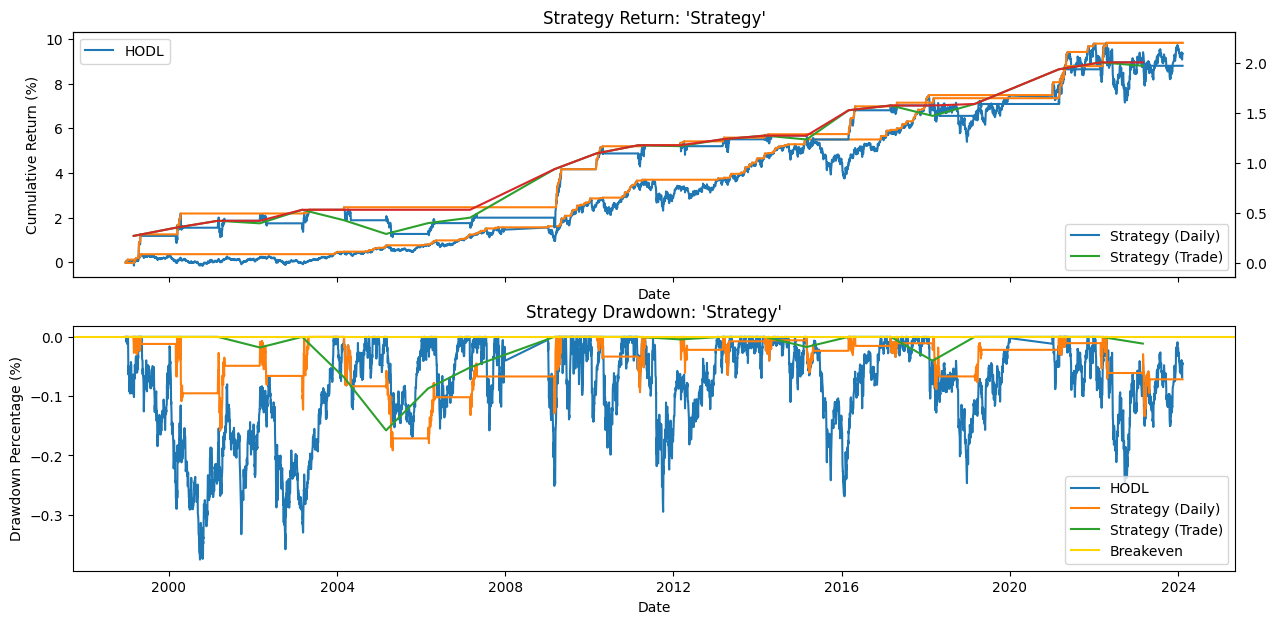

,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLB,XLB,XLB
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04946%,0.12104%,5.24789%
Total Return,934.13%,196.82%,196.82%
Median Return,0.07497%,0.12841%,3.89455%
1st Quartile,-0.68594%,-0.69362%,-1.13608%
3rd Quartile,0.81241%,0.93210%,8.38444%
Std Dev Return,1.36368%,1.41369%,9.74816%
CAGR,4.016 bps,11.108 bps,484.395 bps


In [7]:
strategy_statistics = utils.run(ticker=TICKER, split=constants.SPLIT, do_plot=True)
strategy_statistics

In [8]:
utils.get_statistic(stat_df=strategy_statistics, stat="Total Return")

,HODL,Strategy (Daily),Strategy (Trade)
Total Return,934.13%,196.82%,196.82%


In [9]:
details = utils.get_strategy_returns(ticker=TICKER)
details.keys()

dict_keys(['returns', 'pos', 'trade_returns', 'hodl'])

In [10]:
returns = details["returns"].copy()
positions = details["pos"].copy()
hodl_returns = details["hodl"].copy()


In [11]:
def earlier_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return ((positions.shift(-n) + positions) > 0).astype(int)

def later_positions(pos: pd.Series, n: int = 1) -> pd.Series:
    return earlier_positions(pos=pos, n=-n)

In [12]:
def earlier_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = earlier_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)

def later_returns(hodl: pd.Series, pos: pd.Series, ticker: str, n: int = 1) -> pd.Series:
    new_pos = later_positions(pos=pos, n=n)
    new_rets = new_pos * hodl
    return utils.describe(returns=new_rets, pos=new_pos, daily=True, asset=ticker)


In [13]:
df_earlier = pd.concat([earlier_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(0, 100)], axis=1)
df_later = pd.concat([later_returns(hodl=hodl_returns, pos=positions, ticker=TICKER, n=n) for n in range(1, 100)], axis=1)

In [14]:
statistic = "Trade CAGR"

df_mean = pd.concat([
    pd.Series(df_later.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(1, df_later.shape[1]+1, 1)]),
    pd.Series(df_earlier.loc[statistic].str.split("%", expand=True)[0].astype(float).values, index=[*range(0, -df_earlier.shape[1], -1)]),
], axis=0).sort_index()

In [15]:
import matplotlib.pyplot as plt

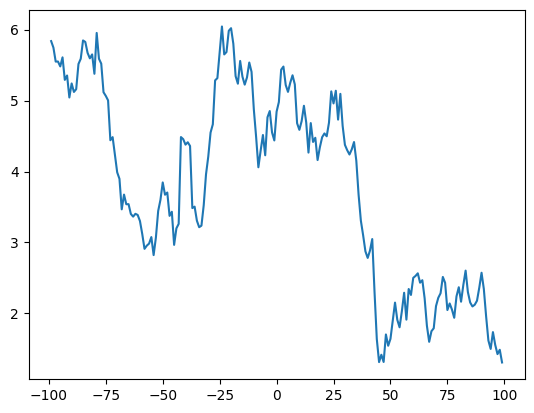

In [16]:
fig, ax = plt.subplots()
ax.plot(df_mean)
plt.show()

# Run Strategy for ALL Tickers Individually

## Calculate Returns

In [17]:
strategy_details = dict()
for ticker in TICKERS:
    print(ticker, end="...")
    details = utils.get_strategy_returns(ticker=ticker)
    strategy_details[ticker] = details
    print("Completed!")

XLC...Completed!
XLY...Completed!
XLP...Completed!
XLE...Completed!
XLF...Completed!
XLV...Completed!
XLI...Completed!
XLB...Completed!
XLRE...Completed!
XLK...Completed!
XLU...Completed!
SPY...Completed!


## Plot Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

ticker = 'XLC'


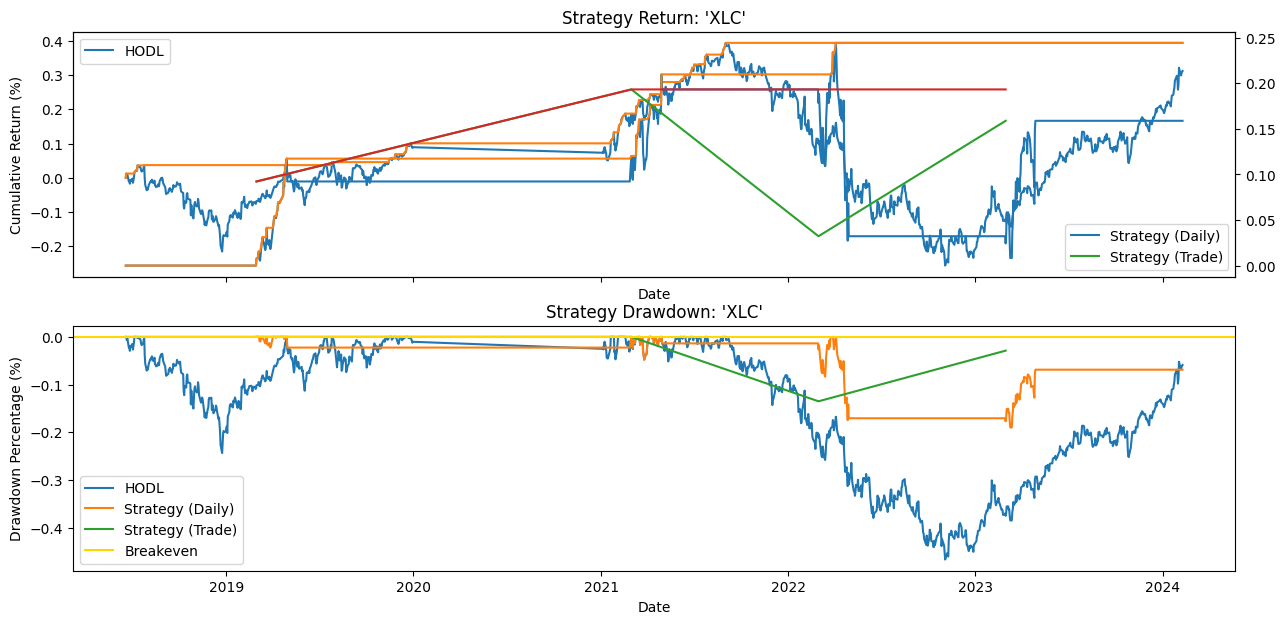


ticker = 'XLY'


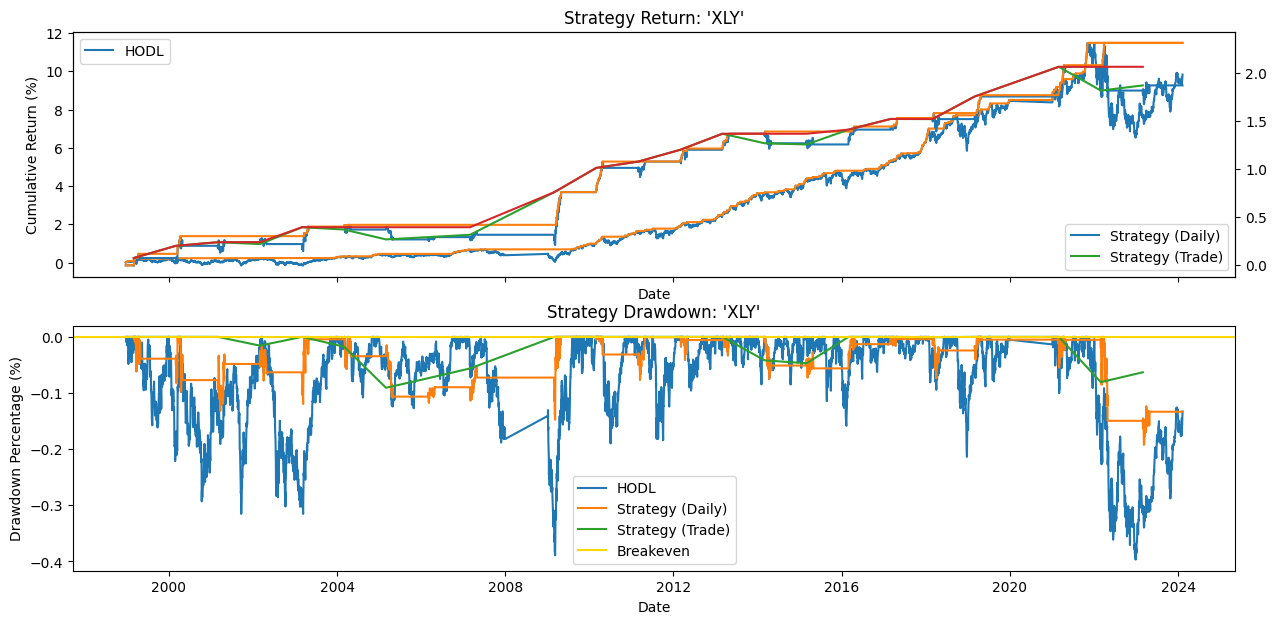


ticker = 'XLP'


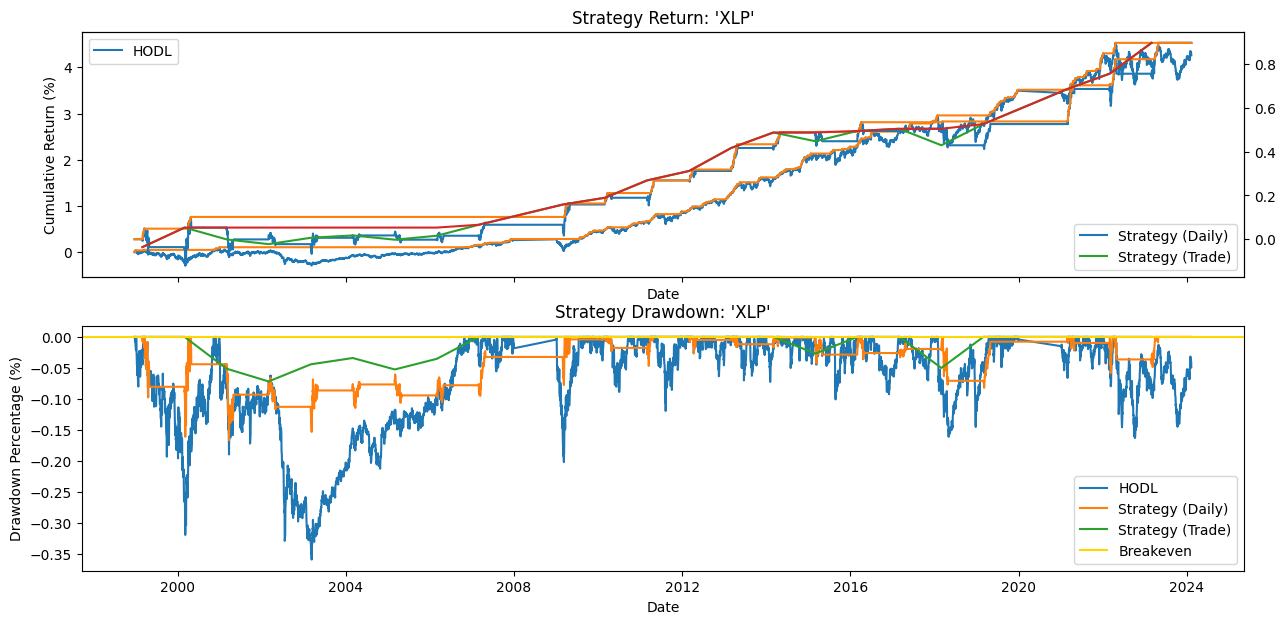


ticker = 'XLE'


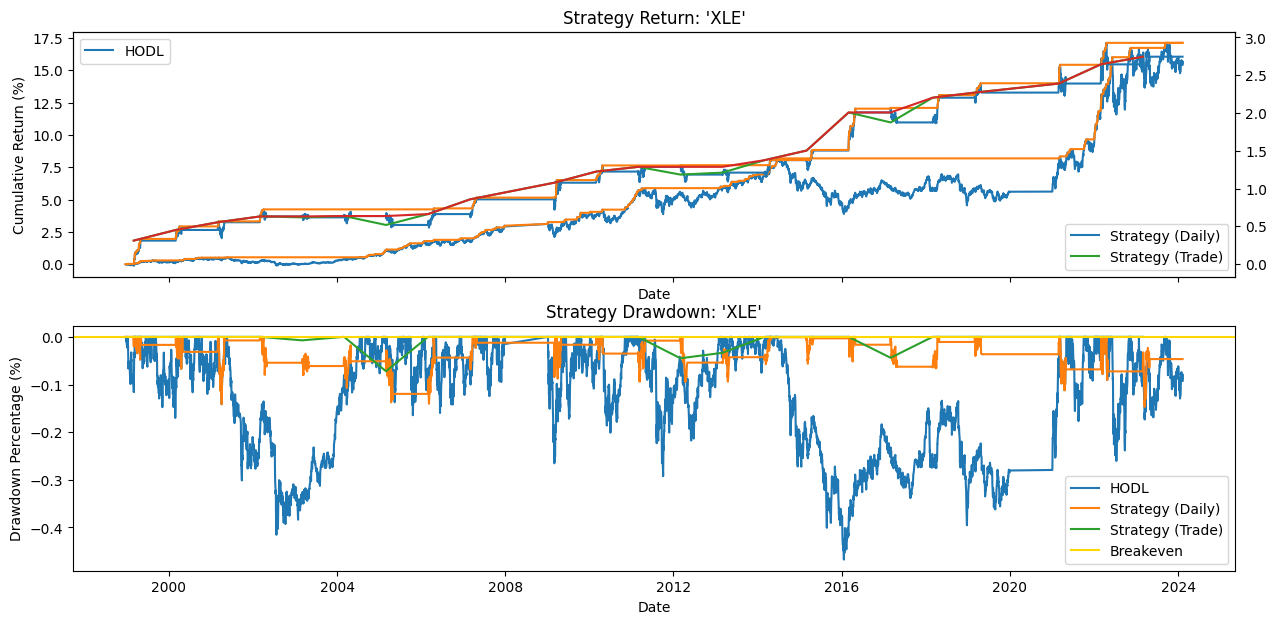


ticker = 'XLF'


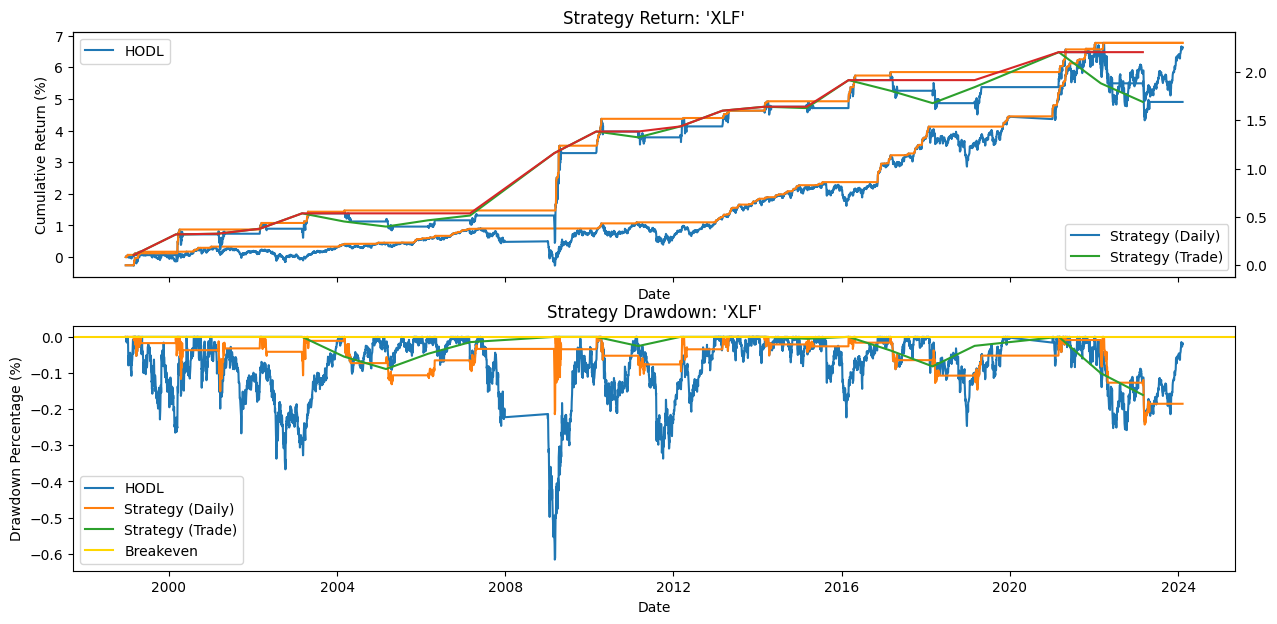


ticker = 'XLV'


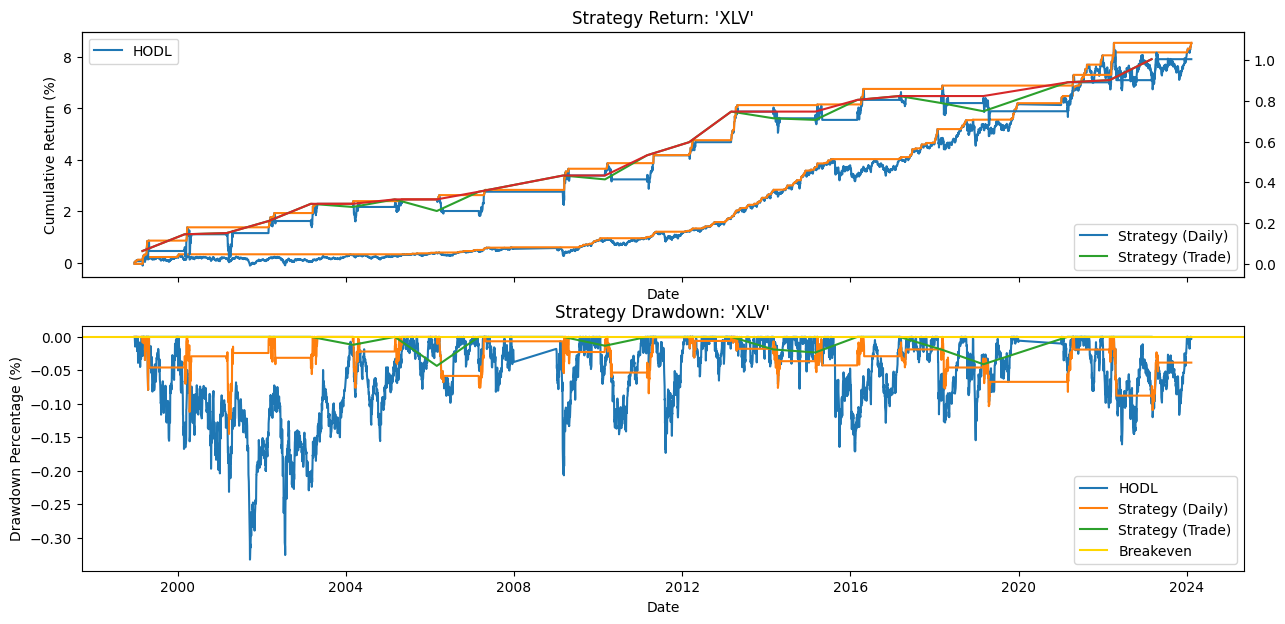


ticker = 'XLI'


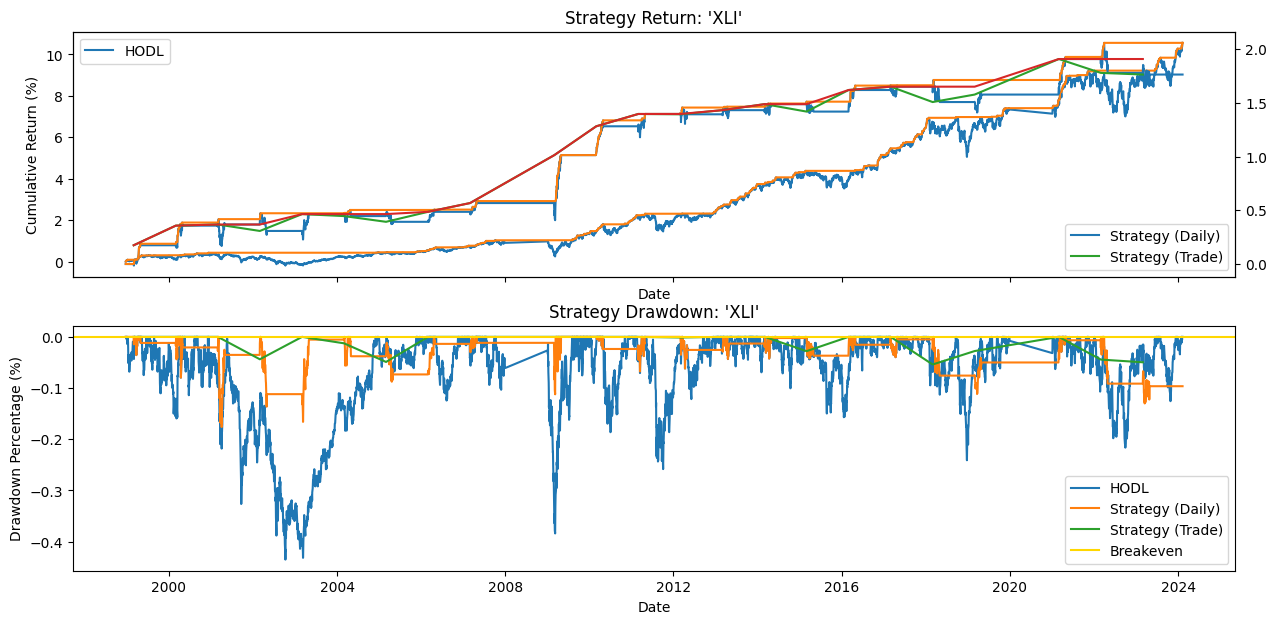


ticker = 'XLB'


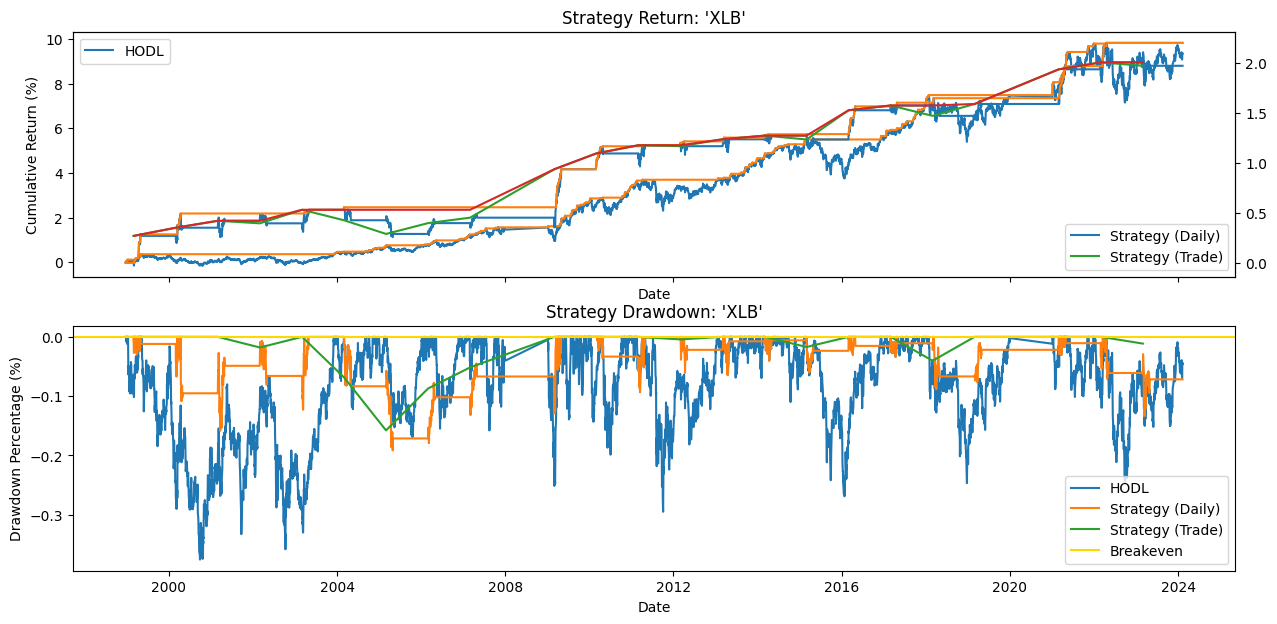


ticker = 'XLRE'


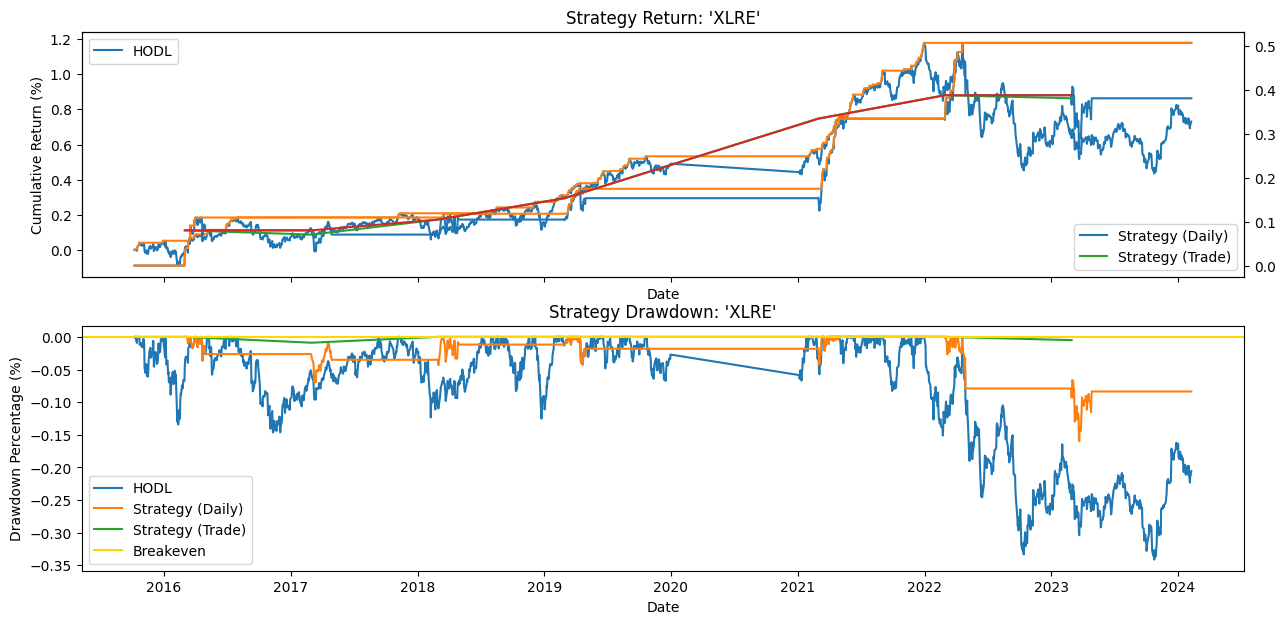


ticker = 'XLK'


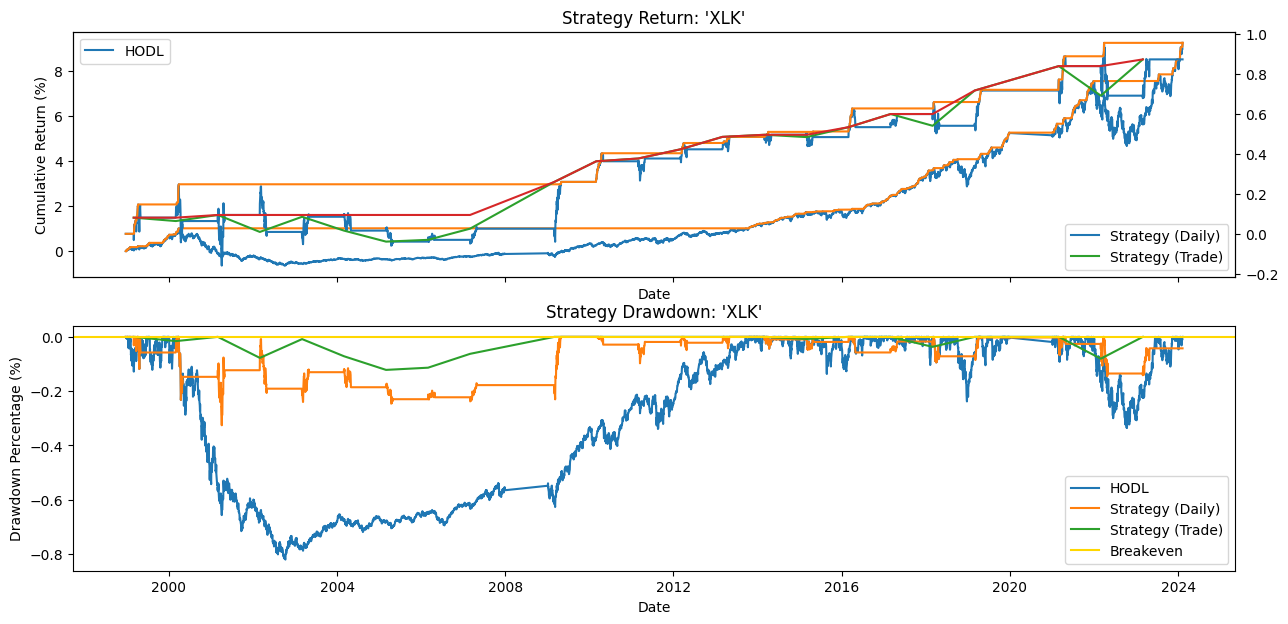


ticker = 'XLU'


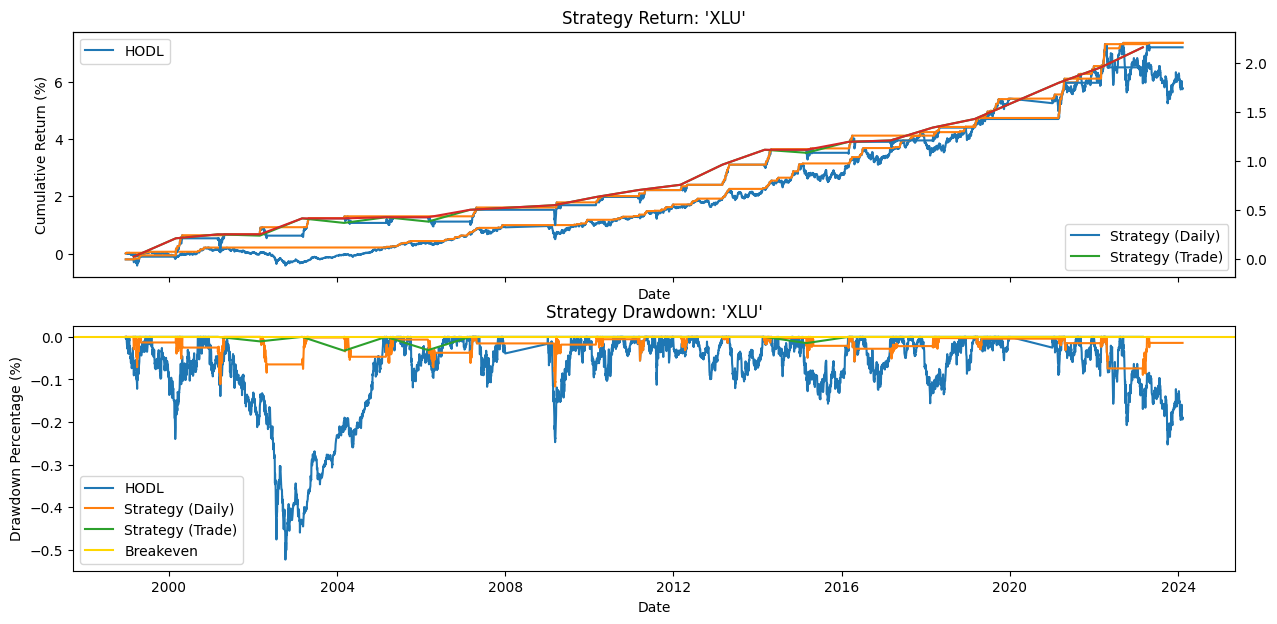


ticker = 'SPY'


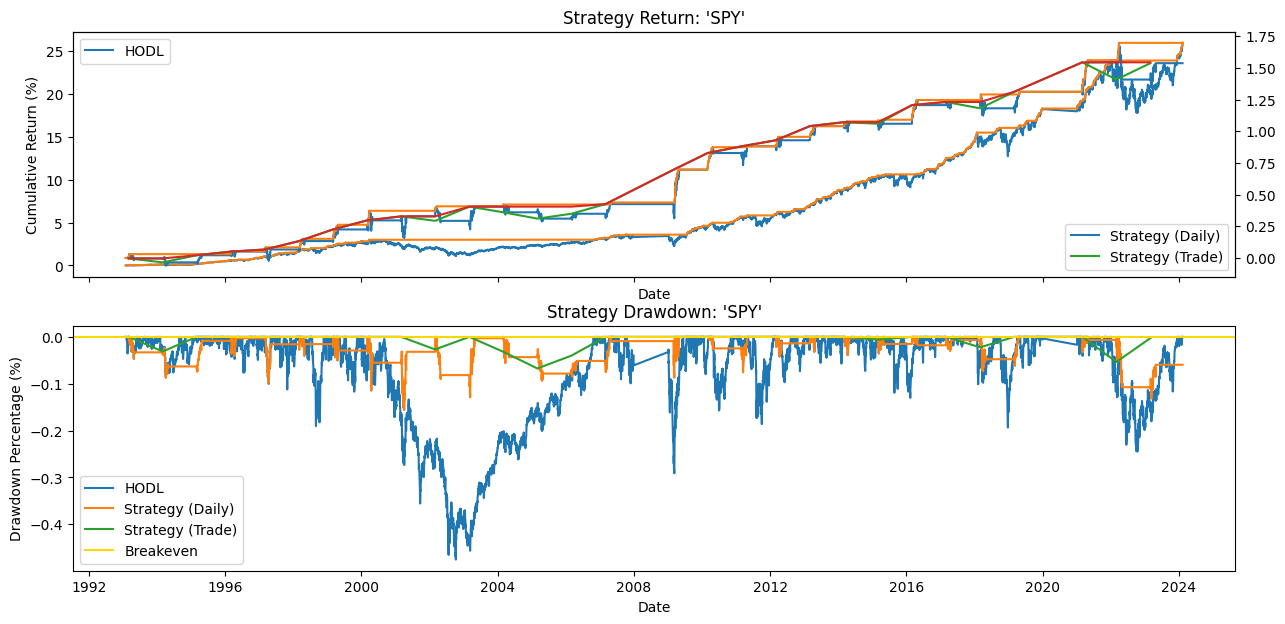

In [18]:
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    utils.plot(asset=ticker, **{"HODL": details["hodl"], "Strategy (Daily)": details["returns"], "Strategy (Trade)": details["trade_returns"]})
    print()

## Describe Returns for HODL, Strategy (Daily Returns) and Strategy (Trade Returns)

In [19]:
descriptions = dict()
for ticker, details in strategy_details.items():
    print(f"{ticker = !r}")
    try:
        description = utils.run(ticker=ticker, split=constants.SPLIT, details=details, do_plot=False)
        display(description)
        descriptions[ticker] = description
    except Exception as e:
        print(f"Exception Raised Running: {e}")
    print("=========================================================================")

all_stock_descriptions = utils.combine_descriptions(**descriptions)

ticker = 'XLC'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLC,XLC,XLC
Start,2018-06-19,2018-06-19,2019-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03257%,0.09633%,4.31165%
Total Return,31.18%,15.89%,15.89%
Median Return,0.06839%,0.06108%,9.23828%
1st Quartile,-0.69772%,-0.76636%,-2.13446%
3rd Quartile,0.76881%,0.90623%,10.75776%
Std Dev Return,1.36623%,1.42530%,11.95921%
CAGR,2.324 bps,8.626 bps,375.470 bps


ticker = 'XLY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLY,XLY,XLY
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04952%,0.11682%,5.01807%
Total Return,983.05%,186.72%,186.72%
Median Return,0.09053%,0.12648%,3.23741%
1st Quartile,-0.59385%,-0.56339%,-0.53578%
3rd Quartile,0.73158%,0.79569%,9.31830%
Std Dev Return,1.30828%,1.36524%,8.79442%
CAGR,4.096 bps,10.754 bps,468.615 bps


ticker = 'XLP'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLP,XLP,XLP
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03250%,0.07014%,2.92704%
Total Return,425.99%,89.76%,89.76%
Median Return,0.04673%,0.08186%,3.23811%
1st Quartile,-0.42942%,-0.39104%,-1.90971%
3rd Quartile,0.51482%,0.54762%,6.78355%
Std Dev Return,0.89049%,0.97579%,4.68561%
CAGR,2.854 bps,6.539 bps,282.423 bps


ticker = 'XLE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLE,XLE,XLE
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.06010%,0.14652%,6.20064%
Total Return,"1,543.98%",274.47%,274.47%
Median Return,0.07339%,0.12066%,5.34273%
1st Quartile,-0.79879%,-0.78980%,1.19802%
3rd Quartile,0.95413%,1.08831%,10.76417%
Std Dev Return,1.54632%,1.53198%,8.23529%
CAGR,4.813 bps,13.482 bps,590.855 bps


ticker = 'XLF'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLF,XLF,XLF
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04704%,0.11831%,4.89470%
Total Return,663.15%,168.80%,168.80%
Median Return,0.05818%,0.10996%,3.90650%
1st Quartile,-0.65272%,-0.63447%,-3.63536%
3rd Quartile,0.75788%,0.84000%,10.48606%
Std Dev Return,1.55913%,1.87991%,10.99839%
CAGR,3.494 bps,10.095 bps,439.282 bps


ticker = 'XLV'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLV,XLV,XLV
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04422%,0.07679%,3.15147%
Total Return,851.04%,100.46%,100.46%
Median Return,0.06346%,0.08415%,4.19935%
1st Quartile,-0.49766%,-0.51341%,-1.19129%
3rd Quartile,0.62090%,0.68377%,6.97549%
Std Dev Return,1.04879%,1.07759%,4.18727%
CAGR,3.872 bps,7.099 bps,306.974 bps


ticker = 'XLI'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLI,XLI,XLI
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04935%,0.11219%,4.83290%
Total Return,"1,055.82%",176.39%,176.39%
Median Return,0.08614%,0.11903%,2.30701%
1st Quartile,-0.55348%,-0.54560%,-1.26071%
3rd Quartile,0.68387%,0.74334%,12.00100%
Std Dev Return,1.20582%,1.29844%,8.48810%
CAGR,4.207 bps,10.379 bps,451.931 bps


ticker = 'XLB'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLB,XLB,XLB
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.04946%,0.12104%,5.24789%
Total Return,934.12%,196.82%,196.82%
Median Return,0.07502%,0.12840%,3.89454%
1st Quartile,-0.68594%,-0.69362%,-1.13606%
3rd Quartile,0.81236%,0.93214%,8.38446%
Std Dev Return,1.36368%,1.41369%,9.74814%
CAGR,4.016 bps,11.108 bps,484.395 bps


ticker = 'XLRE'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLRE,XLRE,XLRE
Start,2015-10-08,2015-10-08,2016-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03567%,0.11366%,4.83995%
Total Return,73.09%,38.03%,38.03%
Median Return,0.09151%,0.09125%,3.98697%
1st Quartile,-0.53097%,-0.41004%,-0.50082%
3rd Quartile,0.65259%,0.67132%,8.01230%
Std Dev Return,1.09007%,1.04345%,5.66798%
CAGR,2.973 bps,10.822 bps,471.240 bps


ticker = 'XLK'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLK,XLK,XLK
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.05165%,0.07756%,2.99278%
Total Return,922.78%,87.17%,87.17%
Median Return,0.10009%,0.04294%,3.33598%
1st Quartile,-0.63952%,-0.67686%,-1.56600%
3rd Quartile,0.77778%,0.81050%,7.50696%
Std Dev Return,1.53063%,1.65223%,7.11200%
CAGR,3.997 bps,6.398 bps,276.283 bps


ticker = 'XLU'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,XLU,XLU,XLU
Start,1998-12-22,1998-12-22,1999-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03865%,0.12247%,5.26239%
Total Return,576.67%,215.65%,215.65%
Median Return,0.08586%,0.15261%,4.28836%
1st Quartile,-0.52935%,-0.42649%,2.74227%
3rd Quartile,0.65422%,0.72367%,7.71333%
Std Dev Return,1.07496%,1.01150%,5.55544%
CAGR,3.287 bps,11.736 bps,512.465 bps


ticker = 'SPY'


,HODL,Strategy (Daily),Strategy (Trade)
Asset,SPY,SPY,SPY
Start,1993-01-29,1993-01-29,1993-03-01
End,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.05062%,0.08133%,3.38436%
Total Return,"2,597.71%",153.75%,153.75%
Median Return,0.06692%,0.08223%,2.90849%
1st Quartile,-0.41629%,-0.41778%,-0.48939%
3rd Quartile,0.58065%,0.63134%,6.09457%
Std Dev Return,1.05063%,1.08781%,5.14300%
CAGR,4.510 bps,7.543 bps,326.308 bps


## Portfolio Returns

In [20]:
all_hodl_returns = pd.concat([details["hodl"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_hodl_returns = all_hodl_returns.sort_index()
all_hodl_returns = all_hodl_returns.fillna(0.0)
all_hodl_returns.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007112
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002119
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010571
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004184


In [21]:
all_returns = pd.concat([details["returns"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_returns = all_returns.sort_index()
all_returns = all_returns.fillna(0.0)
all_returns

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
2024-02-06,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
2024-02-07,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0


In [22]:
all_positions = pd.concat([details["pos"].to_frame(name=ticker) for ticker, details in strategy_details.items()], axis=1)
all_positions = all_positions.sort_index()
all_positions = all_positions.fillna(0.0)
all_positions

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2024-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2024-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2024-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### Equal-Weighted

In [23]:
equal_weighted_positions = all_positions.fillna(0.0).div(all_positions.sum(axis=1) + 1e-5, axis=0)
equal_weighted_position_sum = equal_weighted_positions.sum(axis=1)
equal_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
equal_weighted_returns = (all_hodl_returns * equal_weighted_positions).sum(axis=1)
equal_weighted_returns.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04    0.0
dtype: float64

In [25]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    equal_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    equal_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=equal_weighted_returns, pos=equal_weighted_position_sum, daily=True, asset="Equally-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=equal_weighted_returns, pos=equal_weighted_position_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
    
equal_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Equally-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-03-01
End,2024-02-09,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03343%,0.05062%,0.09475%,4.01966%
Total Return,819.44%,"2,597.71%",202.34%,202.34%
Median Return,0.02287%,0.06692%,0.10234%,2.90731%
1st Quartile,-0.23803%,-0.41629%,-0.38766%,-0.48410%
3rd Quartile,0.35162%,0.58065%,0.60366%,6.88540%
Std Dev Return,0.78344%,1.05063%,1.01329%,5.39175%
CAGR,3.036 bps,4.510 bps,8.963 bps,388.885 bps


In [26]:
utils.get_statistic(stat_df=equal_weighted_description, stat="Total Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Total Return,819.44%,"2,597.71%",202.34%,202.34%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


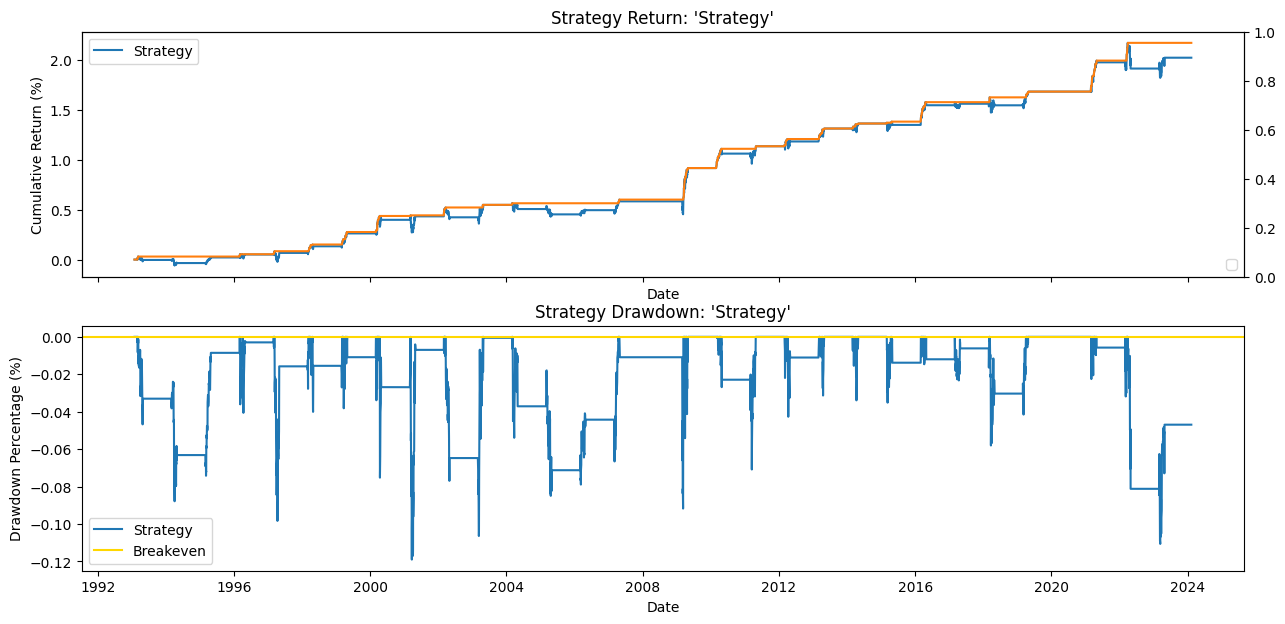

In [27]:
utils.plot(rets=equal_weighted_returns)

### Risk-Weighted

In [28]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [29]:
risk_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = (strategy_returns_by_ticker_prev_years.std() / strategy_returns_by_ticker_prev_years.std().sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    risk_weighted_positions.append(weights)

risk_weighted_positions = pd.concat(risk_weighted_positions, axis=0)
risk_weighted_positions = risk_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
risk_weighted_positions_sum = risk_weighted_positions.sum(axis=1)
risk_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
risk_weighted_returns = (all_hodl_returns * risk_weighted_positions).sum(axis=1)
risk_weighted_returns.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04    0.0
dtype: float64

In [31]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    risk_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    risk_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=risk_weighted_returns, pos=risk_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=risk_weighted_returns, pos=risk_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

risk_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-03-01
End,2024-02-09,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03343%,0.05062%,0.09049%,3.81747%
Total Return,819.44%,"2,597.71%",185.60%,185.60%
Median Return,0.02287%,0.06692%,0.10045%,2.98737%
1st Quartile,-0.23803%,-0.41629%,-0.40854%,-0.43041%
3rd Quartile,0.35162%,0.58065%,0.62132%,7.15384%
Std Dev Return,0.78344%,1.05063%,1.04787%,5.43591%
CAGR,3.036 bps,4.510 bps,8.501 bps,368.499 bps


In [32]:
utils.get_statistic(stat_df=risk_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.09049%,3.81747%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


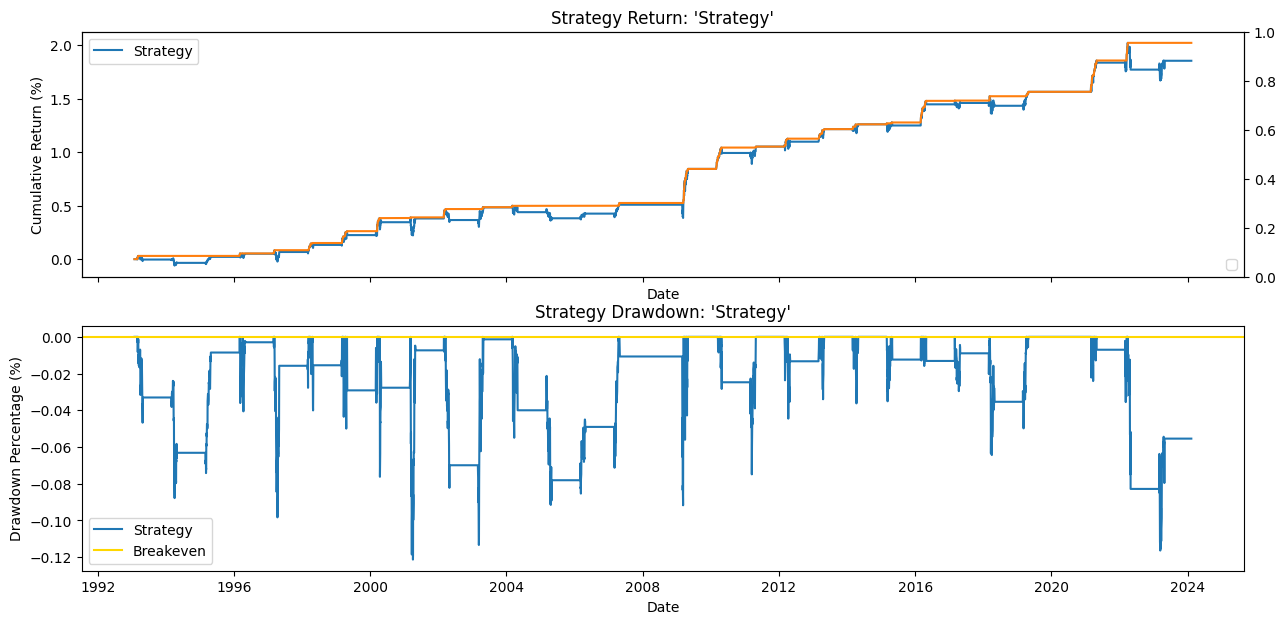

In [33]:
utils.plot(rets=risk_weighted_returns)

### Sharpe-Weighted

In [34]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [35]:
sharpe_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        weights_by_ticker = ((strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()) / (strategy_returns_by_ticker_prev_years.mean() / strategy_returns_by_ticker_prev_years.std()).sum()).to_dict()

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    sharpe_weighted_positions.append(weights)

sharpe_weighted_positions = pd.concat(sharpe_weighted_positions, axis=0)
sharpe_weighted_positions = sharpe_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
sharpe_weighted_positions_sum = sharpe_weighted_positions.sum(axis=1)
sharpe_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
sharpe_weighted_returns = (all_hodl_returns * sharpe_weighted_positions).sum(axis=1)
sharpe_weighted_returns.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04    0.0
dtype: float64

In [37]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    sharpe_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    sharpe_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=sharpe_weighted_returns, pos=sharpe_weighted_positions_sum), daily=False, asset="Equally-weighted",
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

sharpe_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-03-01
End,2024-02-09,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03343%,0.05062%,0.09369%,3.95498%
Total Return,819.44%,"2,597.71%",197.58%,197.58%
Median Return,0.02287%,0.06692%,0.11155%,3.05360%
1st Quartile,-0.23803%,-0.41629%,-0.41426%,-0.15336%
3rd Quartile,0.35162%,0.58065%,0.63179%,7.24503%
Std Dev Return,0.78344%,1.05063%,1.03541%,5.22563%
CAGR,3.036 bps,4.510 bps,8.834 bps,383.201 bps


In [38]:
utils.get_statistic(stat_df=sharpe_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.09369%,3.95498%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


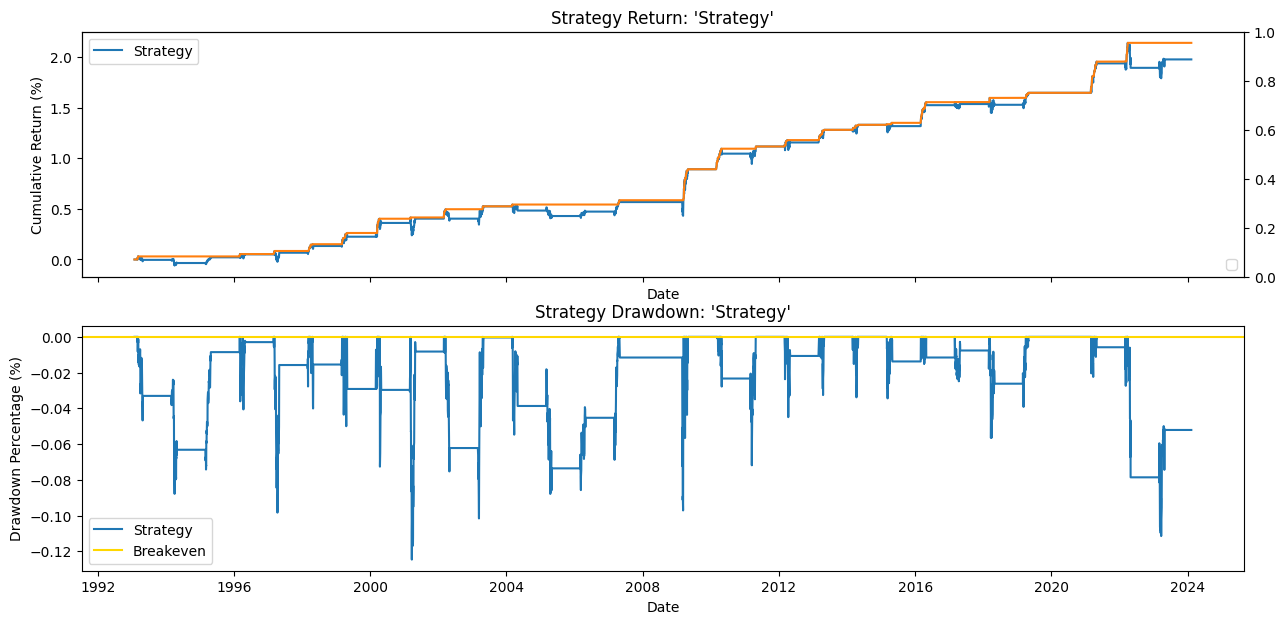

In [39]:
utils.plot(rets=sharpe_weighted_returns)

### Markowitz-Weighted

In [40]:
years = [year for year in range(all_returns.index[0].year, all_returns.index[-1].year)]

In [41]:
markowitz_weighted_positions = []

for i, year in enumerate(years):

    if i == 0:
        weights = all_positions.loc[all_positions.index.year == year].fillna(0.0).div(all_positions.loc[all_positions.index.year == year].sum(axis=1) + 1e-5, axis=0)
    else:
        positions_prev_years = all_positions.loc[all_positions.index.year < year]
        active_positions_prev_years = positions_prev_years.loc[positions_prev_years.sum(axis=1) != 0.0]
        active_tickers_prev_years = active_positions_prev_years.loc[:, active_positions_prev_years.sum(axis=0) != 0]
        strategy_returns_by_ticker_prev_years = all_returns.reindex(index=active_tickers_prev_years.index, columns=active_tickers_prev_years.columns)
        if strategy_returns_by_ticker_prev_years.shape[0] == 0:
            continue
        weights_by_ticker = utils.calculate_markowitz_weights(returns_df=strategy_returns_by_ticker_prev_years)

        positions_this_year = all_positions.loc[all_positions.index.year == year]
        active_positions_this_year = positions_this_year.loc[positions_this_year.sum(axis=1) != 0.0]

        weights = pd.DataFrame(weights_by_ticker, index=active_positions_this_year.index)
        weights = weights.reindex(index=positions_this_year.index, columns=positions_this_year.columns, fill_value=0.0)
    
    markowitz_weighted_positions.append(weights)

markowitz_weighted_positions = pd.concat(markowitz_weighted_positions, axis=0)
markowitz_weighted_positions = markowitz_weighted_positions.reindex(index=all_hodl_returns.index).ffill()
markowitz_weighted_positions_sum = markowitz_weighted_positions.sum(axis=1)
markowitz_weighted_positions.head(5)

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
Date,,,,,,,,,,,,
1993-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
markowitz_weighted_returns = (all_hodl_returns * markowitz_weighted_positions).sum(axis=1)
markowitz_weighted_returns.head(5)

Date
1993-01-29    0.0
1993-02-01    0.0
1993-02-02    0.0
1993-02-03    0.0
1993-02-04    0.0
dtype: float64

In [43]:
train_dates = utils.get_training(all_hodl_returns.mean(axis=1)).index.tolist()
valid_dates = utils.get_validation(all_hodl_returns.mean(axis=1)).index.tolist()
test_dates = utils.get_test(all_hodl_returns.mean(axis=1)).index.tolist()

if constants.SPLIT:
    markowitz_weighted_description = pd.concat([
        utils.describe_split(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe_split(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe_split(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Daily)"),
        utils.describe_split(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted",
            train_dates=train_dates, valid_dates=valid_dates, test_dates=test_dates,
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)
else:
    markowitz_weighted_description = pd.concat([
        utils.describe(returns=all_hodl_returns.mean(axis=1), daily=True, asset="Equally-weighted").to_frame(name="HODL"),
        utils.describe(returns=all_hodl_returns["SPY"], daily=True, asset="SPY").to_frame(name="Market"),
        utils.describe(
            returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum, daily=True, asset="Risk-weighted",
        ).to_frame(name="Strategy (Daily)"),
        utils.describe(
            returns=utils.get_trade_return(returns=markowitz_weighted_returns, pos=markowitz_weighted_positions_sum), daily=False, asset="Equally-weighted"
        ).to_frame(name="Strategy (Trade)"),
    ], axis=1)

markowitz_weighted_description

,HODL,Market,Strategy (Daily),Strategy (Trade)
Asset,Equally-weighted,SPY,Risk-weighted,Equally-weighted
Start,1993-01-29,1993-01-29,1993-01-29,1993-03-01
End,2024-02-09,2024-02-09,2024-02-09,2023-03-01
Mean Return,0.03343%,0.05062%,0.09377%,3.80835%
Total Return,819.44%,"2,597.71%",185.77%,185.77%
Median Return,0.02287%,0.06692%,0.13074%,2.82743%
1st Quartile,-0.23803%,-0.41629%,-0.63757%,0.24575%
3rd Quartile,0.35162%,0.58065%,0.81683%,7.56807%
Std Dev Return,0.78344%,1.05063%,1.32094%,5.10533%
CAGR,3.036 bps,4.510 bps,8.506 bps,368.712 bps


In [44]:
utils.get_statistic(stat_df=markowitz_weighted_description, stat="Mean Return")

,HODL,Market,Strategy (Daily),Strategy (Trade)
Mean Return,0.03343%,0.05062%,0.09377%,3.80835%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


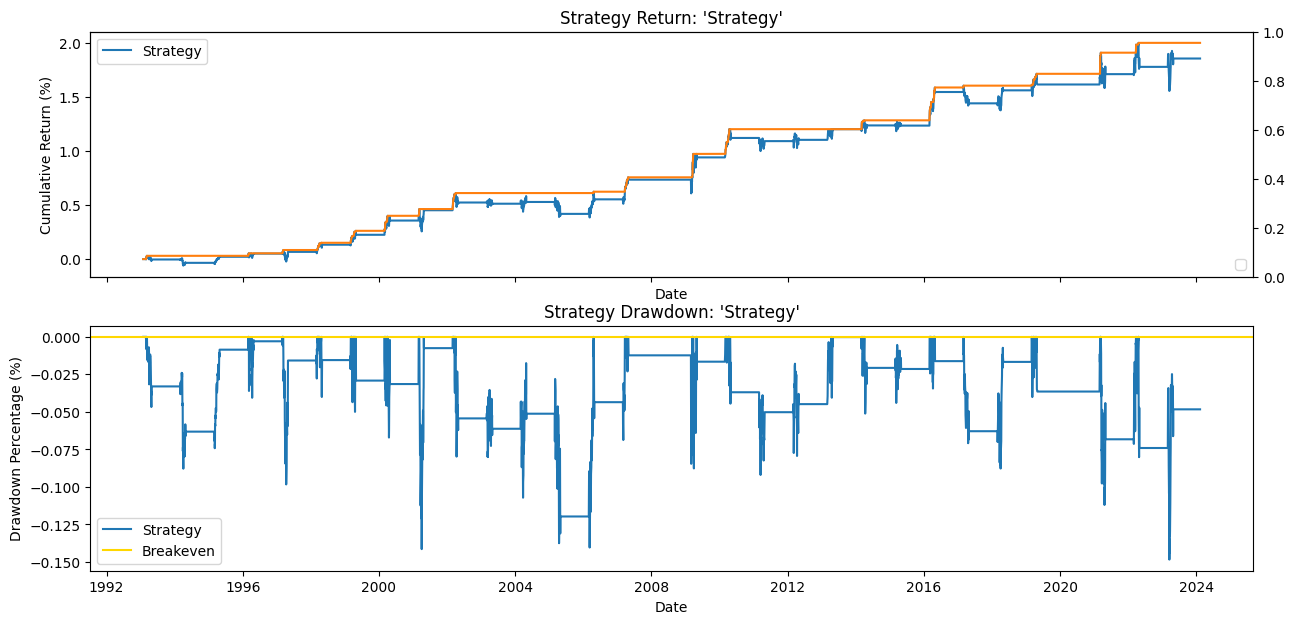

In [45]:
utils.plot(rets=markowitz_weighted_returns)

In [46]:
descriptions = utils.combine_descriptions(
    EW=equal_weighted_description, 
    Risk=risk_weighted_description, 
    Sharpe=sharpe_weighted_description,
    Markowitz=markowitz_weighted_description,
)
descriptions = pd.concat([all_stock_descriptions, descriptions], axis=0)
descriptions

HODL  Strategy (Daily)  \
Type      statistic                                                   
XLC       Asset                               XLC               XLC   
          Start                        2018-06-19        2018-06-19   
          End                          2024-02-09        2024-02-09   
          Mean Return                    0.03257%          0.09633%   
          Total Return                     31.18%            15.89%   
          Median Return                  0.06839%          0.06108%   
          1st Quartile                  -0.69772%         -0.76636%   
          3rd Quartile                   0.76881%          0.90623%   
          Std Dev Return                 1.36623%          1.42530%   
          CAGR                          2.324 bps         8.626 bps   
          Trade CAGR                          N/A            3.755%   
          Ann. CAGR                        6.031%           24.269%   
          Activity Ratio                  100.00%            14.64%   
          Number of Trades                    0.0               4.0   
          Average Hold Period       1,168.00 Days        42.75 Days   
          Daily Sharpe Ratio               0.0238            0.0676   
          Ann. Sharpe Ratio                0.3785            0.4105   
          Daily Sortino Ratio              0.0336            0.1079   
          Ann. Sortino Ratio               0.5331            0.6553   
          Daily Calmar Ratio               0.6684            0.8373   
          Hit Ratio                        52.74%            52.05%   
          Profit Factor                     1.07x             1.20x   
          MDD                             -46.65%           -18.97%   
          MDD Start                    2021-09-01        2022-04-04   
          MDD Bottom                   2022-11-03        2023-03-10   
          MDD End                            None              None   
          MDD Decline Duration           297 Days           27 Days   
          MDD Recovery Duration              None              None   
XLY       Asset                               XLY               XLY   
          Start                        1998-12-22        1998-12-22   
          End                          2024-02-09        2024-02-09   
          Mean Return                    0.04952%          0.11682%   
          Total Return                    983.05%           186.72%   
          Median Return                  0.09053%          0.12648%   
          1st Quartile                  -0.59385%         -0.56339%   
          3rd Quartile                   0.73158%          0.79569%   
          Std Dev Return                 1.30828%          1.36524%   
          CAGR                          4.096 bps        10.754 bps   
          Trade CAGR                          N/A            4.686%   
          Ann. CAGR                       10.870%           31.108%   
          Activity Ratio                  100.00%            16.84%   
          Number of Trades                    0.0              23.0   
          Average Hold Period       5,818.00 Days        42.61 Days   
          Daily Sharpe Ratio               0.0378            0.0856   
          Ann. Sharpe Ratio                0.6008            0.5575   
          Daily Sortino Ratio              0.0529            0.1256   
          Ann. Sortino Ratio               0.8391            0.8185   
          Daily Calmar Ratio              24.7809            9.7009   
          Hit Ratio                        53.08%            54.49%   
          Profit Factor                     1.11x             1.28x   
          MDD                             -39.67%           -19.25%   
          MDD Start                    2021-11-19        2022-03-29   
          MDD Bottom                   2022-12-28        2023-03-10   
          MDD End                            None              None   
          MDD Decline Duration           278 Days           31 Days  

In [52]:
statistic = "Profit Factor"

if constants.SPLIT:
    train_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Train"]
    display(utils.get_statistic(stat_df=train_descriptions, stat=statistic).sort_values("Strategy (Daily)"))

    validation_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Validation"]
    display(utils.get_statistic(stat_df=validation_descriptions, stat=statistic).sort_values("Strategy (Daily)"))
    
    test_descriptions = descriptions.loc[descriptions.index.get_level_values("set") == "Test"]
    display(utils.get_statistic(stat_df=test_descriptions, stat=statistic).sort_values("Strategy (Daily)"))

else:
    display(utils.get_statistic(stat_df=descriptions, stat=statistic).sort_values("Strategy (Daily)"))

,,HODL,Strategy (Daily),Strategy (Trade),Market
Type,statistic,,,,
XLK,Profit Factor,1.10x,1.15x,3.05x,NaN
XLC,Profit Factor,1.07x,1.20x,2.28x,NaN
XLV,Profit Factor,1.12x,1.21x,6.44x,NaN
Markowitz,Profit Factor,1.14x,1.21x,7.49x,1.15x
XLP,Profit Factor,1.11x,1.23x,4.28x,NaN
XLF,Profit Factor,1.10x,1.23x,4.02x,NaN
SPY,Profit Factor,1.15x,1.24x,5.62x,NaN
XLB,Profit Factor,1.10x,1.26x,5.73x,NaN
XLY,Profit Factor,1.11x,1.28x,5.89x,NaN


## Random Strategy Comparisons

In [48]:
# df_ret = strategy_details["SPY"]["hodl"]

In [49]:
# def create_random_strategy(returns: pd.Series, activity: float = 1.0):

#     rand = pd.Series(np.random.uniform(0, 1, len(returns)), index=returns.index)
#     rand_pos = (rand <= activity).astype(int)

#     rand_strat_returns = returns * rand

#     return {"returns": rand_strat_returns, "pos": rand_pos}
    

In [50]:
# pd.concat([describe(**create_random_strategy(returns=df_ret, activity=0.1309)) for _ in range(10)], axis=1)

In [51]:
# pd.concat([describe(returns=get_trade_return(**create_random_strategy(returns=df_ret, activity=0.1309))) for _ in range(10)], axis=1)